In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

# (Signed) Antisparse Correlated ($[1 \quad \rho \quad \rho^2 \quad \rho^3]$)

In [2]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV3.pkl")[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV4.pkl")[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV5.pkl")[['Model','rho', 'SINR']]
df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3], axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (3240, 3)
Number of diverge cases for WSM is :  0


,rho,WSM,BSM,ICA,LDMI,PMF
0,0.0,28.530613,26.636128,30.661892,30.093877,30.581207
1,0.1,27.081579,21.976925,24.684397,30.043257,30.554361
2,0.2,26.110483,17.018768,19.513195,29.652219,30.304359
3,0.3,25.064194,13.612000,16.064201,29.057735,30.096689
4,0.4,24.176977,10.928033,13.432579,29.510080,29.995195
5,0.5,21.565136,8.612590,11.219490,26.744909,29.523496
6,0.6,20.947243,6.634232,9.244048,26.376512,29.308155
7,0.7,18.640105,4.615644,7.348498,20.250147,28.812010
8,0.8,15.310335,2.514009,5.325773,13.501184,27.717016


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


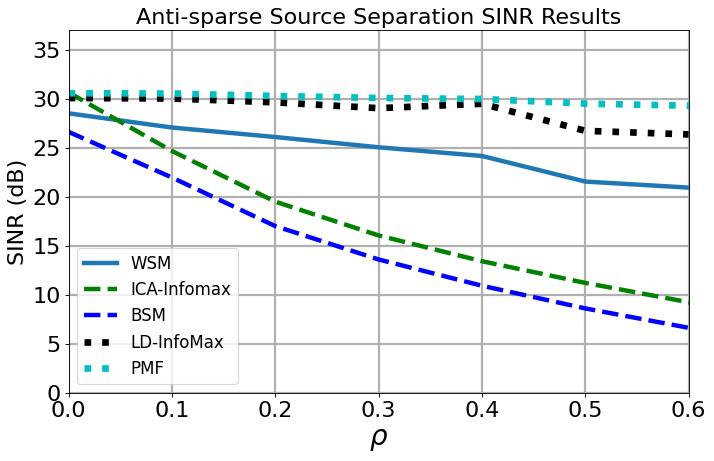

In [3]:
SetPlotRC()

SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRWSM,'-', linewidth=4, label = "WSM")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.6,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())

In [4]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
36,WSM,0.0,73,28.530613
37,WSM,0.1,73,27.081579
38,WSM,0.2,73,26.110483
39,WSM,0.3,72,25.064194
40,WSM,0.4,72,24.176977
41,WSM,0.5,72,21.565136
42,WSM,0.6,72,20.947243
43,WSM,0.7,71,18.640105
44,WSM,0.8,70,15.310335


# Nonnegative Antisparse Correlated ($[1 \quad \rho \quad \rho \quad \rho \quad \rho]$)

In [5]:
df_nnanti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV1.pkl")[['Model','rho', 'SINR']]
df_nnanti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl")[['Model','rho', 'SINR']]
df_nnanti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV3.pkl")[['Model','rho', 'SINR']]
df_nnanti_results = pd.concat([df_nnanti_results1, df_nnanti_results2, df_nnanti_results3], axis = 0)

print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (2030, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  1


,rho,NSM,ICA,LDMI,PMF,WSM
0,0.0,35.408746,30.329114,36.035092,36.225298,24.264484
1,0.1,24.313746,21.614456,35.959273,36.112043,23.345024
2,0.2,17.982401,16.391834,36.150848,36.158737,25.455075
3,0.3,14.131829,13.148706,36.399904,36.286675,25.346326
4,0.4,10.921713,10.738786,36.284417,35.975347,23.497979
5,0.5,8.384121,8.745803,35.899748,35.445037,22.822646
6,0.6,6.040570,6.971216,35.418335,34.786160,21.572487
7,0.7,4.190104,3.955609,34.216068,33.527224,20.955270
8,0.8,3.084755,3.963151,32.490873,31.976827,17.992105


Shape : (2030, 3)
Number of diverge cases for WSM is :  1


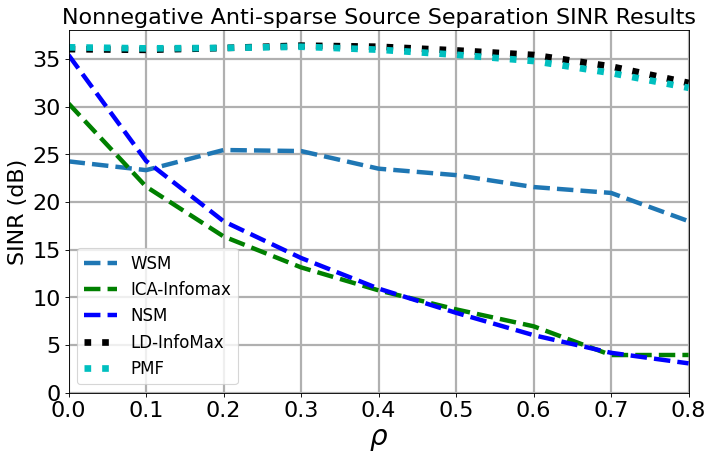

In [6]:
df_nnanti_results = pd.concat([
                               df_nnanti_results1, 
                               df_nnanti_results2, 
                               df_nnanti_results3
                              ],
                              axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()

SetPlotRC()

SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF, 'c:', linewidth=6, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,38])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
# plt.savefig('Figures/WSM_NNAntisparse_CorrelatedV2.pdf', format='pdf')

In [7]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
36,WSM,0.0,45,24.264484
37,WSM,0.1,46,23.345024
38,WSM,0.2,46,25.455075
39,WSM,0.3,46,25.346326
40,WSM,0.4,46,23.497979
41,WSM,0.5,44,22.822646
42,WSM,0.6,44,21.572487
43,WSM,0.7,44,20.955270
44,WSM,0.8,44,17.992105
